## Домашняя работа №7

<ol>
    <li>Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике? 
    </li>
    <li>* Ссылка на репозиторий с полным кодом для обучения ssd нейросети - https://github.com/sergeyveneckiy/ssd-tensorflow. Попробуйте улучшить точность ее работы и напишите отчет, что вы пробовали изменить в ее параметрах и как это отражалось на процессе обучения нейронной сети. 
        Обратите внимание! Мин. сист. требования для запуска данного проекта - это минимум 8 Gb ОЗУ. Если у вас недостаточно мощности компьютера, то вы можете просто изучить содержимое исходного кода и датасета данного проекта.</li>

</ol>

1.

Для самостоятельного изучения алгоритма object detection взят:

**End-to-End Object Detection with Transformers**
 
 - https://arxiv.org/abs/2005.12872 оригинальная статья

Авторы статьи: Nicolas Carion, Francisco Massa, Gabriel Synnaeve, Nicolas Usunier, Alexander Kirillov, Sergey Zagoruyko (Facebook AI, 2020)

Основная суть DETR заключается в том, то он сразу предсказывает все объекты и тренируется с лоссом, который делает двустороннее соответствие (performs bipartite) между предсказанными боксами и разметкой. Получается, что эффективно устраняется необходимость во многих разработанных вручную компонентах, таких как процедура не максимального подавления или генерация привязки, которые явно кодируют наши предварительные знания о задаче.

Основными компонентами новой платформы, названной DEtection TRansformer orDETR, являются глобальные потери на основе набора, которые обеспечивают уникальные прогнозы посредством двустороннего сопоставления, и архитектура преобразователя-кодера-декодера Гивена.

Для прямого предсказания сетов нужны две составные части (DETR Model): лосс, который делает уникальный матчинг между предсказанными и размеченными боксами, и архитектура, которая за один проход предсказывает сеты объектов и моделирует их взаимосвязи.

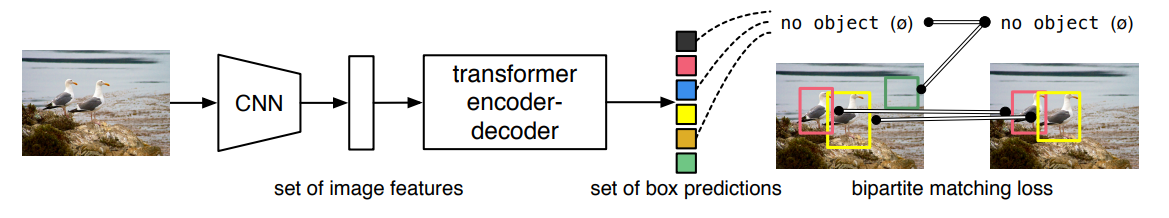

Новая модель концептуально проста и не требует специальной библиотеки, в отличие от многих других современных детекторов. DETR демонстрирует точность и производительность во время выполнения наравне с устоявшейся и высокооптимизированной базовой линией Faster RCNN для сложного объекта COCO набор данных обнаружения. Кроме того, DETR может быть легко обобщен, чтобы произвести паноптическую сегментацию унифицированным способом. Мы показываем, что он значительно превосходит конкурентные базовые показатели.

Модель предсказывает N объектов за один раз. Backbone: можно использовать любую. На выходе авторы хотят иметь feature maps с 2048 каналами, высота и ширина картонок в 32 раза меньше оригинальных.

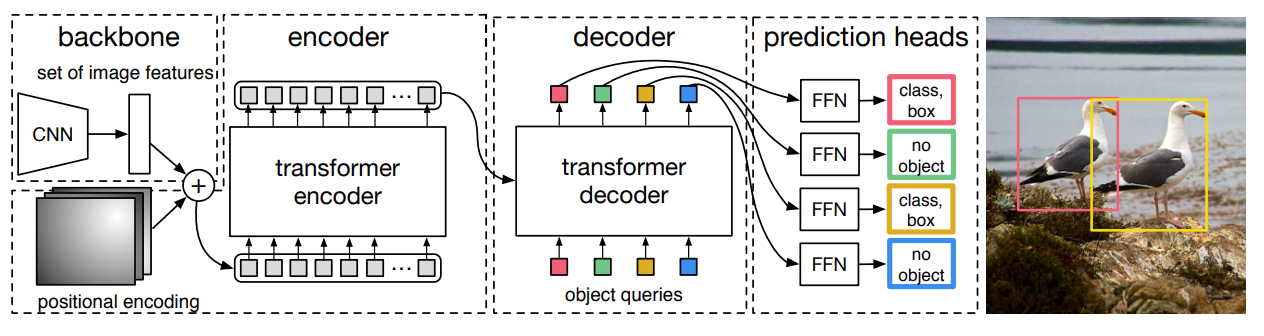

Для DETR for panoptic segmentation, просто добавляет голову с маской после декодера (бинарно на каждый класс). Но боксы все равно надо предсказывать — для лосса. И классы предсказываются с помощью argmax по каждому пикселю. Так защищаемся от потенциального перекрытия масок разных классов.

Есть один минус: авторы признают, что DETR отлично работает на больших объектах, то хуже на мелких. И для тренировки нужно, цитирую "extra-long training schedule", а также дополнительные лоссы. Базовая модель даёт 42 AP на COCO, но тренируется 3 дня на 16 V100. С другой стороны, подход можно использовать и для других задач, например, сегментации. И про качество, чем больше объектов, тем хуже работает модель. При количестве экземпляров объекта близком к 100, и определении объекта такого класса, например как человек, собака, яблоко, ошибка предсказания составляет порядка порядка 60-70%. При количестве объектов до 40 ошибка предсказания практически нулевая.

В таблице ниже обычный Faster R-CNN тренировался в 3 раза дольше обычного. Значок "+"означает тренировку в 9 раз дольше (109 эпох). DETR тащит почти все AP — кроме AP75 и APs.

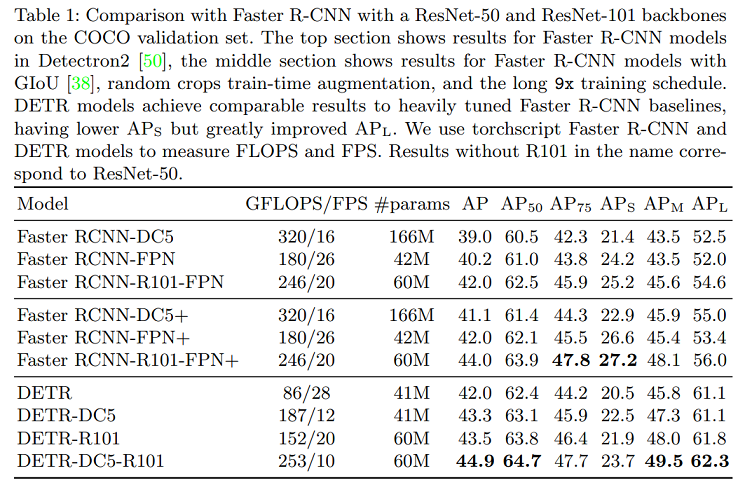

<img src="attachment:ndcz2sdbmuco_w86jbhotrw5waw.png" width="400">